https://keras-cn.readthedocs.io/en/latest/other/application/

In [300]:
for layer in resnet_flower_model.layers[:10]:
    layer.trainable = False

NameError: name 'resnet_flower_model' is not defined

In [301]:
!pip install pydot

(60000, 28, 28)
(10000, 28, 28)


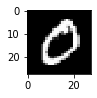

In [334]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K

#K.set_image_dim_ordering('th')


(train_data, train_label), (test_data, test_label) = mnist.load_data()
print(train_data.shape)
print(test_data.shape)
train_data = train_data.reshape(train_data.shape[0], 28, 28,1)
train_data = train_data.astype('float32')

from keras.utils import to_categorical
train_label = to_categorical(train_label)

# 创建一个 3*3的九宫格，以显示图片
pyplot.subplot(330 + 1)
pyplot.imshow(train_data[1].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
pyplot.show()


In [335]:
print(test_data.shape)
test_data = test_data.reshape(test_data.shape[0], 28, 28,1)
test_data = test_data.astype('float32')
test_label = to_categorical(test_label)
print(test_data.shape)

(10000, 28, 28)
(10000, 28, 28, 1)


In [336]:
print(train_data.shape)
print(train_label.shape)
print(len(train_label))

print(test_data.shape)
print(test_label.shape)
print(len(test_label))

(60000, 28, 28, 1)
(60000, 10)
60000
(10000, 28, 28, 1)
(10000, 10)
10000


In [348]:
# 随机数种子，重复性设置
np.random.seed(1689)
 
# 网络结构和训练的参数
EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = 'rmsprop'
VALIDATION_SPLIT = 0.2

In [349]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: 定义你的网络架构

model.add(Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=(28, 28,1)))
#model.add(Conv2D(32, (3,3), input_shape=(160, 160, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=2))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.5))
model.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))

model.add(GlobalAveragePooling2D())

model.add(Dropout(0.5))

model.add(Dense(NB_CLASSES, activation='softmax'))

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 3, 3, 128)       

In [308]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(train_data, train_label, batch_size=BATCH_SIZE, epochs=EPOCH, verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 10s 208us/step - loss: 2.7828 - acc: 0.3195 - val_loss: 0.6640 - val_acc: 0.8288
Epoch 2/20
48000/48000 [==============================] - 10s 198us/step - loss: 0.7846 - acc: 0.7399 - val_loss: 0.2075 - val_acc: 0.9477
Epoch 3/20
48000/48000 [==============================] - 9s 198us/step - loss: 0.4588 - acc: 0.8555 - val_loss: 0.1247 - val_acc: 0.9689
Epoch 4/20
48000/48000 [==============================] - 9s 198us/step - loss: 0.3443 - acc: 0.8939 - val_loss: 0.0878 - val_acc: 0.9758
Epoch 5/20
48000/48000 [==============================] - 9s 198us/step - loss: 0.2817 - acc: 0.9135 - val_loss: 0.0750 - val_acc: 0.9800
Epoch 6/20
48000/48000 [==============================] - 9s 198us/step - loss: 0.2445 - acc: 0.9257 - val_loss: 0.0634 - val_acc: 0.9832
Epoch 7/20
48000/48000 [==============================] - 9s 198us/step - loss: 0.2159 - acc: 0.9351 - val_loss: 0.0589 

In [309]:
# 评估模型
score = model.evaluate(test_data, test_label, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])


10000/10000 [==============================] - 1s 78us/step
Test score: 0.028671354174159933
Test accuracy: 0.991100013256073


In [310]:
from keras.models import Model
import matplotlib.pyplot as plt

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


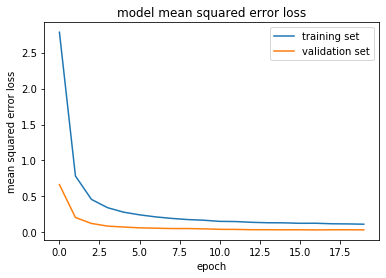

In [311]:
### print the keys contained in the history object
print(history.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

# 1 完整保存模型所有状态

可以使用model.save(filepath)将Keras模型和权重保存在一个HDF5文件中，该文件将包含：

模型的结构，以便重构该模型

模型的权重

训练配置（损失函数，优化器等）

优化器的状态，以便于从上次训练中断的地方开始

使用keras.models.load_model(filepath)来重新实例化你的模型，如果文件中存储了训练配置的话，该函数还会同时完成模型的编译

**优势**：不仅保存了模型结构和参数，也保存了训练配置等信息，可以方便从上次训练中断的地方继续优化；

**劣势**：占用空间太大

In [312]:
model_all = 'my_model_all.h5'
model.save(model_all)

In [313]:
# 加载整个模型
model_01 = load_model(model_all)
 
# 也可以继续训练模型
#history_01 = model_01.fit(train_data, train_label, batch_size=BATCH_SIZE, epochs=EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

In [314]:
# 评估模型
score = model_01.evaluate(test_data, test_label, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 86us/step
Test score: 0.028671354174159933
Test accuracy: 0.991100013256073


# 2.分别保存/加载模型结构和权重

**优势**:节省硬盘空间，方便同步和协作

**劣势**:丢失了训练的一些配置信息 

In [315]:
model_save_weights = "my_model_weights.h5"
# 保存模型权重
model.save_weights(model_save_weights)

In [316]:
# 加载模型权重,原model加载参数可以继续训练
model.load_weights(model_save_weights)

score = model.evaluate(test_data, test_label, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 65us/step
Test score: 0.028671354174159933
Test accuracy: 0.991100013256073


### 方法1：保存为json

In [317]:
json_string = model.to_json()
open('my_model_arthitecture.json', 'w').write(json_string)   #重命名

3503

In [318]:
#从json中读出数据
from keras.models import model_from_json
model_02 = model_from_json(json_string)

In [319]:
# 加载模型权重,原model加载参数可以继续训练
model_02.load_weights(model_save_weights)

In [320]:
model_02.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

#history_02 = model_02.fit(train_data, train_label, batch_size=BATCH_SIZE, epochs=EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

In [321]:
score = model_02.evaluate(test_data, test_label, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 86us/step
Test score: 0.028671354174159933
Test accuracy: 0.991100013256073


## 方法2：保存为yaml

In [322]:
yaml_string = model.to_yaml()
open('my_model_arthitecture.yaml', 'w').write(yaml_string)  #重命名

4112

In [323]:
#从json中读出数据
from keras.models import model_from_yaml
model_03 = model_from_yaml(yaml_string)

# 加载模型权重,原model加载参数可以继续训练
model_03.load_weights(model_save_weights)

In [324]:
model_03.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

#history_03 = model_03.fit(train_data, train_label, batch_size=BATCH_SIZE, epochs=EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

In [325]:
score = model_03.evaluate(test_data, test_label, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 87us/step
Test score: 0.028671354174159933
Test accuracy: 0.991100013256073


这几种保存模型的联系与区别

|方法 	        |保存模型结构	|保存模型权重	|是否能进行模型预测|
|--------------------|-------------|-------------|------------------|
|model.save()      |是	      |是        |是|
|model.save_weights()|否	       |是	      |是|
|model.to_json()    |是	      |否	      |加载权重，编译后能进行正常预测|
model.to_yaml()     |是        |	否       |加载权重，编译后能进行正常预测|

ps:重新加载模型后，可以重新训练；或者加载模型和权重后，在上一次权重基础上继续训练；

### compile做什么？

compile定义了loss function损失函数、optimizer优化器和metrics度量。它与权重无关，也就是说compile并不会影响权重，不会影响之前训练的问题。

In [326]:
!pip install pydot-ng 

# 保存最佳模型

In [327]:
from keras.callbacks import ModelCheckpoint

keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

在每个训练期之后保存模型。

filepath 可以包括命名格式选项，可以由 epoch 的值和 logs 的键（由 on_epoch_end 参数传递）来填充。

例如：如果 filepath 是 weights.{epoch:02d}-{val_loss:.2f}.hdf5， 那么模型被保存的的文件名就会有训练轮数和验证损失。

filepath: 字符串，保存模型的路径。

monitor: 被监测的数据。

verbose: 详细信息模式，0 或者 1 。

save_best_only: 如果 save_best_only=True， 只保存在验证集上性能最好的模型。

mode: {auto, min, max} 的其中之一。 如果 save_best_only=True，那么是否覆盖保存文件的决定就取决于被监测数据的最大或者最小值。 

对于 val_acc，模式就会是 max，

而对于 val_loss，模式就需要是 min，等等。 

在 auto 模式中，方向会自动从被监测的数据的名字中判断出来。

save_weights_only: 如果 True，那么只有模型的权重会被保存 (model.save_weights(filepath))， 否则的话，整个模型会被保存 (model.save(filepath))。

period: 每个CheckPoint之间的间隔（训练轮数）。

In [350]:
#from keras.callbacks import Tensorboad
from keras.callbacks import ModelCheckpoint

filepath='weights.best.hdf5'

checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max',
                             period=1)

callbacks_list = [checkpoint]

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['acc'])


In [351]:
history_04 = model.fit(train_data, train_label,validation_data=(test_data, test_label), batch_size=BATCH_SIZE, epochs=EPOCH,validation_split=VALIDATION_SPLIT,callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 204us/step - loss: 1.3368 - acc: 0.6510 - val_loss: 0.1234 - val_acc: 0.9631

Epoch 00001: val_acc improved from -inf to 0.96310, saving model to weights.best.hdf5
Epoch 2/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.2708 - acc: 0.9161 - val_loss: 0.0583 - val_acc: 0.9808

Epoch 00002: val_acc improved from 0.96310 to 0.98080, saving model to weights.best.hdf5
Epoch 3/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.1952 - acc: 0.9413 - val_loss: 0.0549 - val_acc: 0.9828

Epoch 00003: val_acc improved from 0.98080 to 0.98280, saving model to weights.best.hdf5
Epoch 4/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.1671 - acc: 0.9511 - val_loss: 0.0403 - val_acc: 0.9868

Epoch 00004: val_acc improved from 0.98280 to 0.98680, saving model to weights.best.hdf5
Epoch 5/20
60000/60000 [=============

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


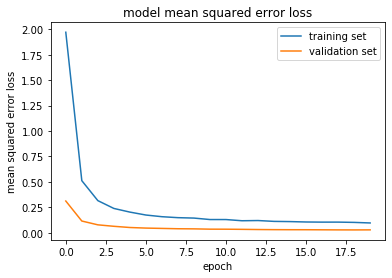

In [352]:
### print the keys contained in the history object
print(history_04.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_05.history['loss'])
plt.plot(history_05.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [345]:
from keras.callbacks import ModelCheckpoint
 
# checkpoint
filepath = "weights-improvement-{epoch:02d}-{val_acc:.3f}.hdf5"

# 中途训练效果提升, 则将文件保存, 每提升一次, 保存一次
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,mode='max')
callbacks_list = [checkpoint]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [346]:
history_05 = model.fit(train_data, train_label,validation_data=(test_data, test_label),
                       batch_size=BATCH_SIZE, 
                       epochs=EPOCH,
                       validation_split=VALIDATION_SPLIT,
                       callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 205us/step - loss: 1.9712 - acc: 0.4447 - val_loss: 0.3115 - val_acc: 0.9287

Epoch 00001: val_acc improved from -inf to 0.92870, saving model to weights-improvement-01-0.929.hdf5
Epoch 2/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.5117 - acc: 0.8366 - val_loss: 0.1148 - val_acc: 0.9692

Epoch 00002: val_acc improved from 0.92870 to 0.96920, saving model to weights-improvement-02-0.969.hdf5
Epoch 3/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.3155 - acc: 0.9015 - val_loss: 0.0774 - val_acc: 0.9788

Epoch 00003: val_acc improved from 0.96920 to 0.97880, saving model to weights-improvement-03-0.979.hdf5
Epoch 4/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.2386 - acc: 0.9262 - val_loss: 0.0630 - val_acc: 0.9823

Epoch 00004: val_acc improved from 0.97880 to 0.98230, saving model to weights

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


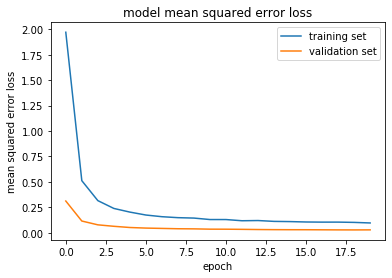

In [347]:
### print the keys contained in the history object
print(history_05.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_05.history['loss'])
plt.plot(history_05.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()